In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import os
import requests
import json



In [2]:
data = pd.read_csv("../project-1-group-10/Data/Tourism data by industry.csv")
labour_df = pd.DataFrame(data)
labour_df.dropna(inplace=True)
labour_df

,Tourism characteristic and connected industries,Sep-2004,Dec-2004,Mar-2005,Jun-2005,Sep-2005,Dec-2005,Mar-2006,Jun-2006,Sep-2006,...,Sep-2019,Dec-2019,Mar-2020,Jun-2020,Sep-2020,Dec-2020,Mar-2021,Jun-2021,Sep-2021,Dec-2021
0,Accommodation,98.0,98.3,93.1,88.6,84.9,86.6,84.8,80.6,91.4,...,93.0,100.9,91.9,77.6,77.6,80.9,80.9,91.0,82.6,94.4
1,"Cafes, restaurants and takeaway food services",125.2,132.3,134.9,136.2,137.7,138.2,128.3,127.4,137.8,...,222.6,233.8,221.9,189.3,207.7,215.1,227.8,224.5,195.4,229.2
2,"Clubs, pubs, taverns and bars",33.5,35.4,35.5,38.5,36.9,37.0,33.8,36.0,36.9,...,56.6,59.4,55.3,46.5,52.8,54.6,56.7,55.1,49.7,58.2
3,Rail transport,1.3,1.3,1.3,1.3,1.3,1.4,1.4,1.3,1.4,...,2.1,2.0,2.1,1.9,1.9,2.0,2.0,2.0,1.9,2.1
4,Road transport and transport equipment rental,6.0,6.0,6.4,6.4,6.5,6.5,6.6,6.6,6.7,...,7.7,7.4,7.5,6.5,6.8,7.0,7.1,7.1,6.5,7.3
5,"Air, water and other transport",26.4,26.9,27.8,27.8,28.1,28.5,28.9,28.6,28.9,...,34.3,34.8,32.1,25.4,19.5,20.2,24.7,24.9,21.7,24.2
6,Travel agency and information centre services,26.4,26.1,25.0,28.0,26.7,26.6,26.1,29.4,28.1,...,39.5,37.6,36.2,31.8,32.9,33.8,34.4,34.5,31.4,35.7
7,Cultural services,8.0,7.8,8.2,8.0,8.0,7.8,7.8,8.3,8.3,...,11.7,12.7,11.7,8.9,9.6,9.8,10.6,9.8,9.7,10.2
8,Casinos and other gambling services,3.0,2.9,3.1,3.0,3.0,2.9,2.9,3.0,3.1,...,4.0,4.0,3.9,3.5,3.4,3.6,3.6,3.7,3.4,3.8
9,Sports and recreation services,20.2,19.7,20.9,20.2,20.0,19.9,19.9,20.7,21.4,...,32.3,36.1,32.3,28.4,29.3,30.1,30.7,30.8,28.0,31.8


<function matplotlib.pyplot.show(close=None, block=None)>

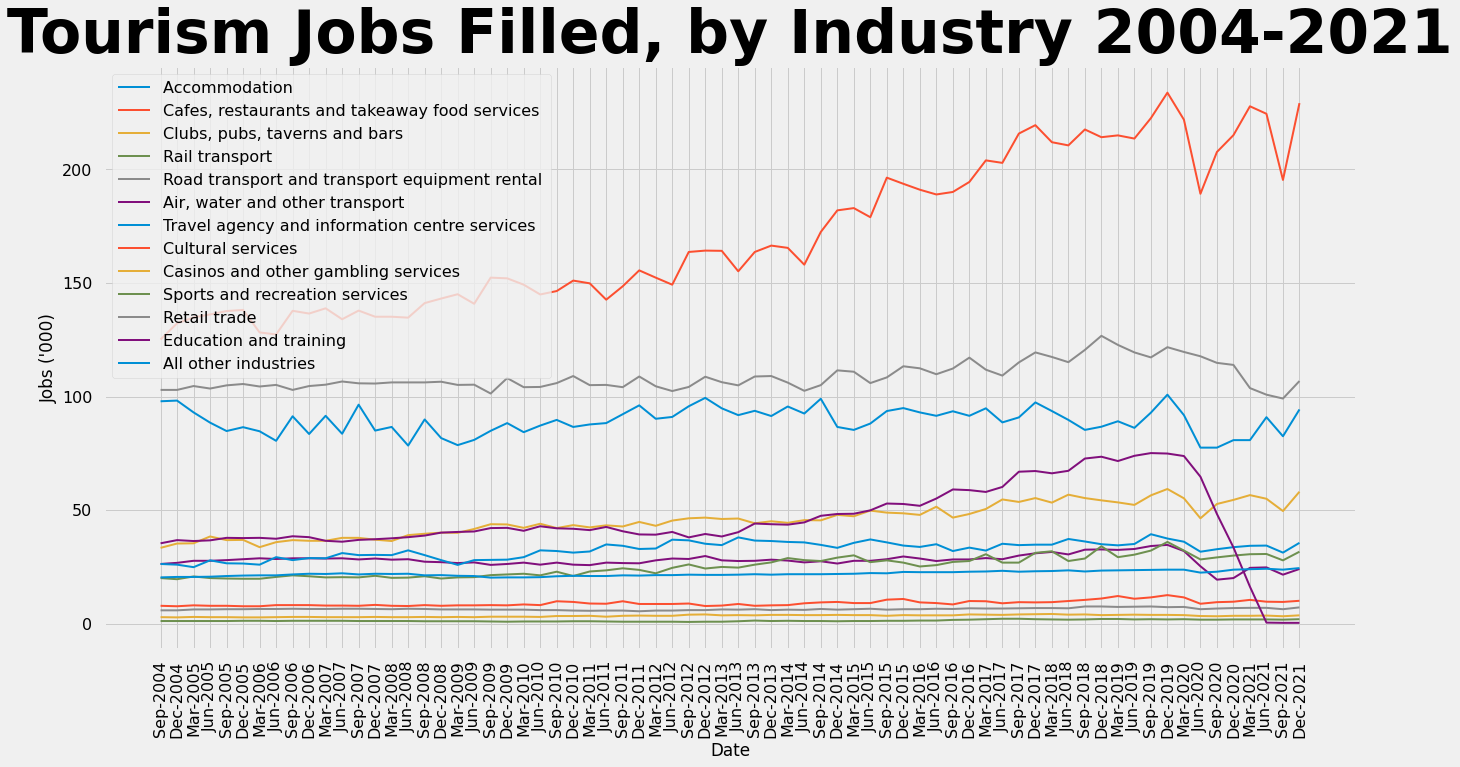

In [9]:
plt.figure(figsize=(20,10))
plot_df = labour_df.drop(labels=[12, 14,15])
plot_df.reset_index(drop=True,inplace=True)

labels=[]


for index,row in plot_df.iterrows():
    x_axis = plot_df.columns.values.tolist()
    x_axis.pop(0)
    y_axis = plot_df.loc[index,:].values.tolist()
    y_axis.pop(0)
    labels.append(plot_df.iloc[index,0])
    plt.plot(x_axis,y_axis, linewidth=2, markersize=2)
    plt.xticks(ticks=x_axis,rotation=90)

plt.style.use('fivethirtyeight')
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 60}
plt.title("Tourism Jobs Filled, by Industry 2004-2021", fontdict=font)
plt.xlabel("Date")
plt.ylabel("Jobs ('000)")
plt.legend(labels,loc="upper left")
plt.show 


In [8]:
# Cafes, restaurants and takeaway food services is the industry with the most jobs pre and post covid
# This industry suffered two large drops in number of employees, but seems to have recovered these losses to almost pre-covid numbers
# Education and Training drops out of the data in a strange way. We can assume the entire Edu and Training industry didn't 
# completely shut down last year, possibly this industry is now being assessed through other metrics, making it invalid in 2021

(54.0, 69.0, 0.0, 250.0)

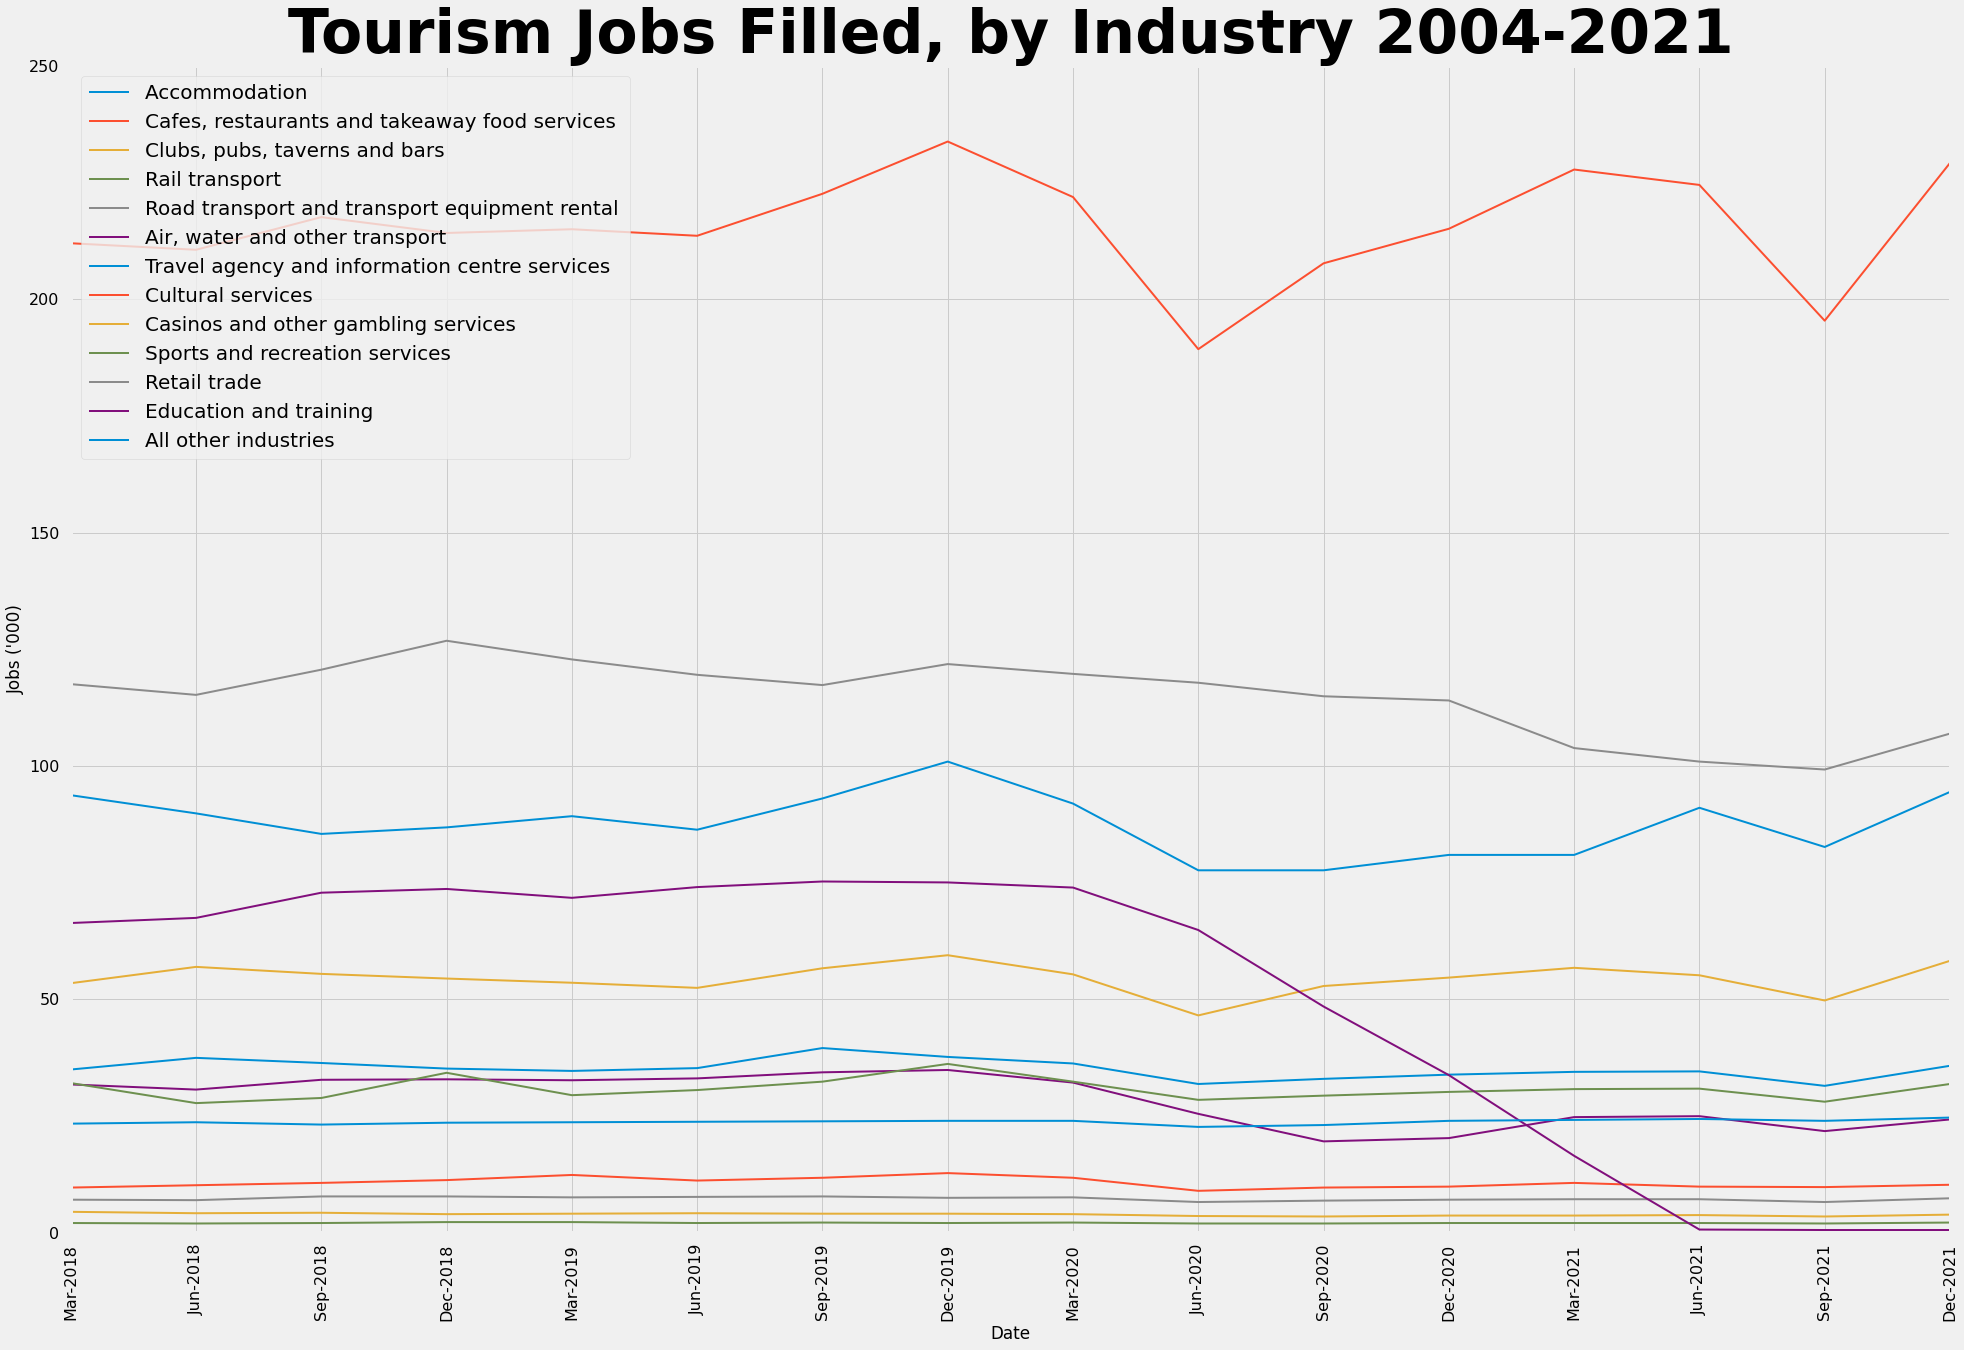

In [12]:
labels=[]
plt.figure(figsize=(30,20))
for index,row in plot_df.iterrows():
    x_axis = plot_df.columns.values.tolist()
    x_axis.pop(0)
    y_axis = plot_df.loc[index,:].values.tolist()
    y_axis.pop(0)
    labels.append(plot_df.iloc[index,0])
    plt.plot(x_axis,y_axis, linewidth=2, markersize=2)
    plt.xticks(ticks=x_axis,rotation=90)
    
plt.style.use('fivethirtyeight')
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 60}
plt.title("Tourism Jobs Filled, by Industry 2004-2021", fontdict=font)

plt.xlabel("Date")
plt.ylabel("Jobs ('000)")
plt.legend(labels,loc="upper left", fontsize=20)
plt.show 
plt.axis(["Mar-2018","Dec-2021",0,250])

In [6]:
# In this close up we see the Hospitality industry begins to drop after December 2019, and a more significant drop at March 2020.
# We see another drop in jobs filled at June 2021, before they pick up again after September 2021

<function matplotlib.pyplot.show(close=None, block=None)>

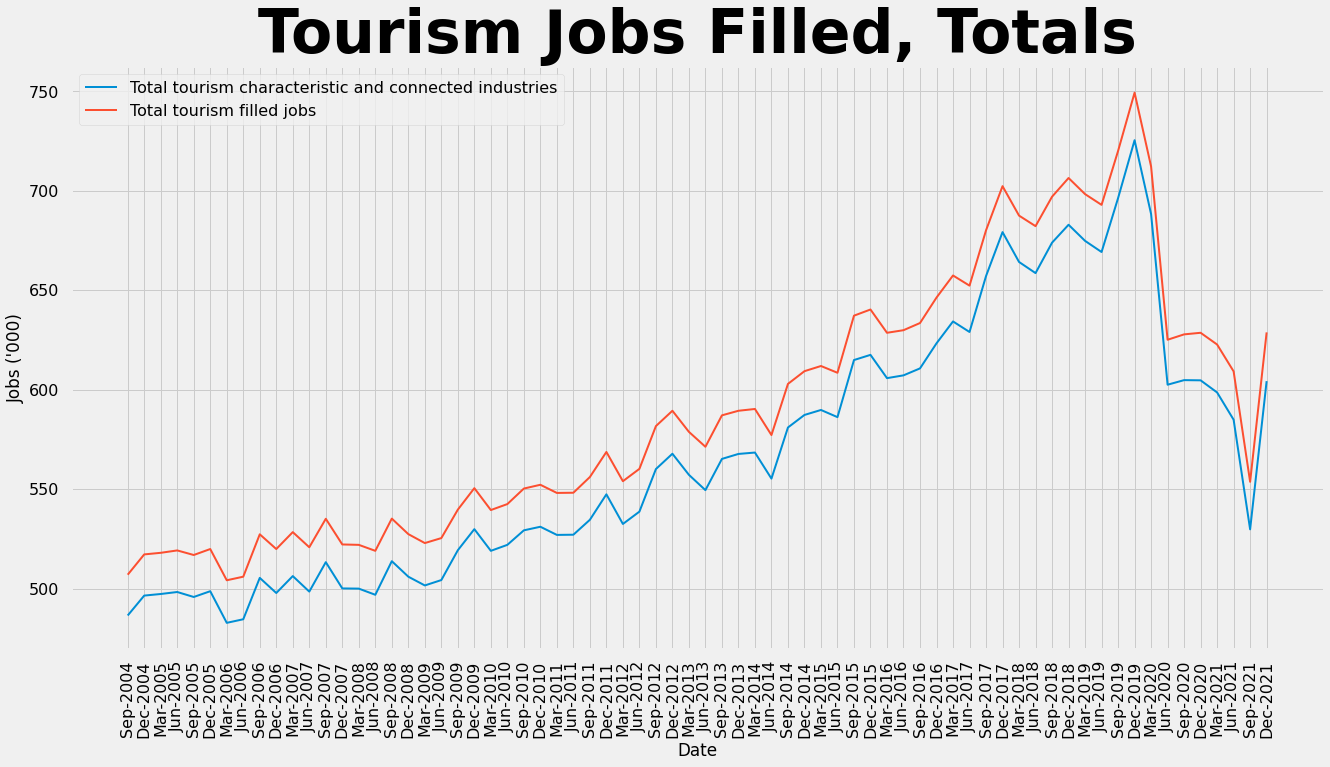

In [13]:
plot_df_2 = labour_df.loc[[12,14]]
plot_df_2
plot_df_2.reset_index(drop=True,inplace=True)
plot_df_2

plt.figure(figsize=(20,10))
labels=[]

for index,row in plot_df_2.iterrows():
    x_axis = plot_df_2.columns.values.tolist()
    x_axis.pop(0)
    
    y_axis = plot_df_2.loc[index,:].values.tolist()
    y_axis.pop(0)
    labels.append(plot_df_2.iloc[index,0])
    plt.plot(x_axis,y_axis, linewidth=2, markersize=2)
    plt.xticks(ticks=x_axis,rotation=90)

# %matplotlib inline
plt.style.use('fivethirtyeight')
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 60}
plt.title("Tourism Jobs Filled, Totals",fontdict=font)
plt.xlabel("Date")
plt.ylabel("Jobs ('000)")
plt.legend(labels)
plt.show 
# plt.axis(["Mar-2018","Dec-2021",0,10000])

In [8]:
# Here we see total tourism filled jobs.
# We can see that the tourism industry was reaching it's highest peak of employees yet in 2019 *create mean plot


<function matplotlib.pyplot.show(close=None, block=None)>

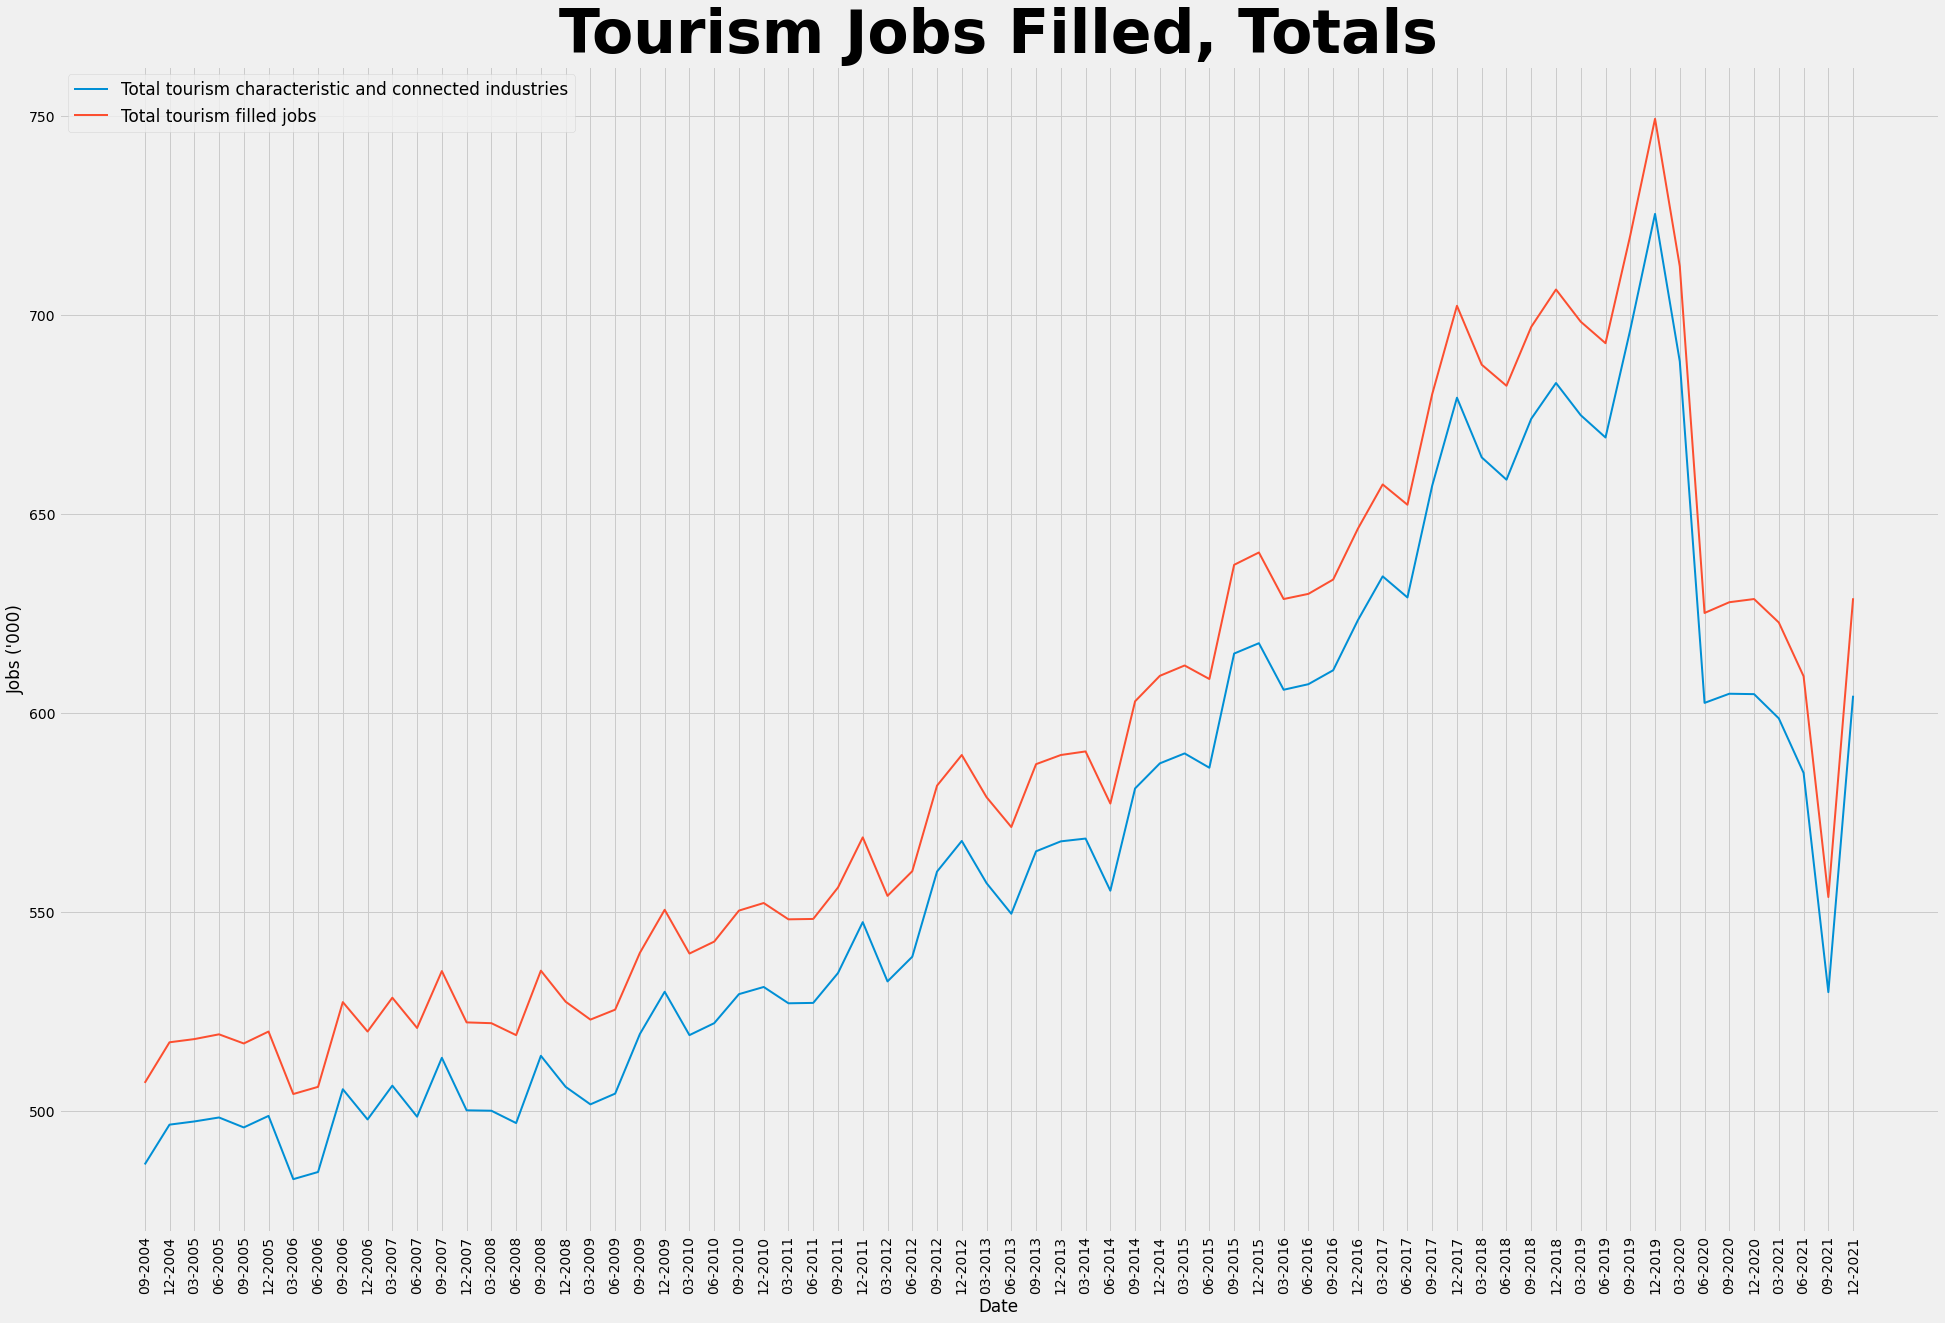

In [42]:



plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('fivethirtyeight')
labels=[]
plt.figure(figsize=(30,20))

for index,row in plot_df_2.iterrows():
    x_axis = plot_df_2.columns.values.tolist()
    x_axis.pop(0)
    
    y_axis = plot_df_2.loc[index,:].values.tolist()
    y_axis.pop(0)
    labels.append(plot_df_2.iloc[index,0])
    plt.plot(x_axis,y_axis, linewidth=2, markersize=2)
    plt.xticks(ticks=x_axis,rotation=90)


font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 60}
plt.title("Tourism Jobs Filled, Totals",fontdict=font)
plt.xlabel("Date")
plt.ylabel("Jobs ('000)")
plt.legend(labels,fontsize="large")

plt.show 

# plt.axis(["Sep-2018","Dec-2021",400,800])



In [10]:
# We see the the amount of jobs naturally falling off after December, then a sharp drop in March
# Plus another dip in numbers originating at June 2021
# *mean tables of year percent for this and arrivals?

In [39]:
import datetime as dt
from datetime import datetime

plot_df_3 = pd.DataFrame(labour_df.loc[15])
plot_df_3
date_list = pd.DataFrame(plot_df_3.index)
date_list[0] = date_list[0].str.replace("Sep","09")
date_list[0] = date_list[0].str.replace("Dec","12")
date_list[0] = date_list[0].str.replace("Mar","03")
date_list[0] = date_list[0].str.replace("Jun","06")
date_list = date_list.drop(0)
date_list

date_list_2 = pd.DataFrame(columns=["Date","Timestamp"])
date_list[0].values.tolist()
date_list = (date_list)
# date_list_2["Date"] = date_list
# date_list_2["Timestamp"] = date_list_2["Date"]
# for i in range(len(date_list_2)):
#     date_list_2["Timestamp"][i] = date_list_2["Date"][i].toordinal()
# date_list_2["Timestamp"] = date_list_2["Timestamp"].apply(pd.to_numeric)
# date_list_2


# plt.figure(figsize=(20,10))
# labels=[plot_df_3.iloc[0,0]]
# x_axis = plot_df_3.index.tolist()
# x_axis.pop(0)

# y_axis = plot_df_3.iloc[:,0].values.tolist()
# y_axis.pop(0)
# y_axis

# xlabels = plot_df_2.columns.tolist()
# xlabels.pop(0)
# labels.append(plot_df_3.iloc[0,0])
# datelist = plot_df_3.index.to_list()

# date_list_2["Date"] = date_list_2["Date"].replace("00:00:00","")
# plt.plot(date_list_2["Timestamp"],y_axis, linewidth=2, markersize=2)
# plt.xticks(ticks=date_list_2["Timestamp"].tolist(),rotation=90, labels=xlabels)

# slope, intercept, r_value, p_value, std_err  = st.linregress(date_list_2["Timestamp"], y_axis)
# # print(slope, intercept, r_value, p_value, std_err)
# plt.plot(date_list_2["Timestamp"],(slope*date_list_2["Timestamp"])+intercept,'r')

# plt.style.use('fivethirtyeight')
# font = {'family' : 'sans-serif',
#         'weight' : 'bold',
#         'size'   : 60}
# plt.title("Total Economy-Wide Filled Jobs",fontdict=font)
# plt.xlabel("Date")
# plt.ylabel("Jobs ('000)")
# plt.legend(labels)
# # plt.xlim(736754,738125)
# plt.show 
# print(f"The r value = {round(r_value,2)}")



AttributeError: 'int' object has no attribute 'lower'

In [12]:
# The R-Value shows a very strong correlation between time and increase of economy filled jobs. 
# I added the line equation to see whether we have bounced back post covid. 
# We can see that we are far exceeding the projected amount of jobs filled post-Covid

The r value = 0.98


/Users/alexanderpowers/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(13000.0, 15000.0)

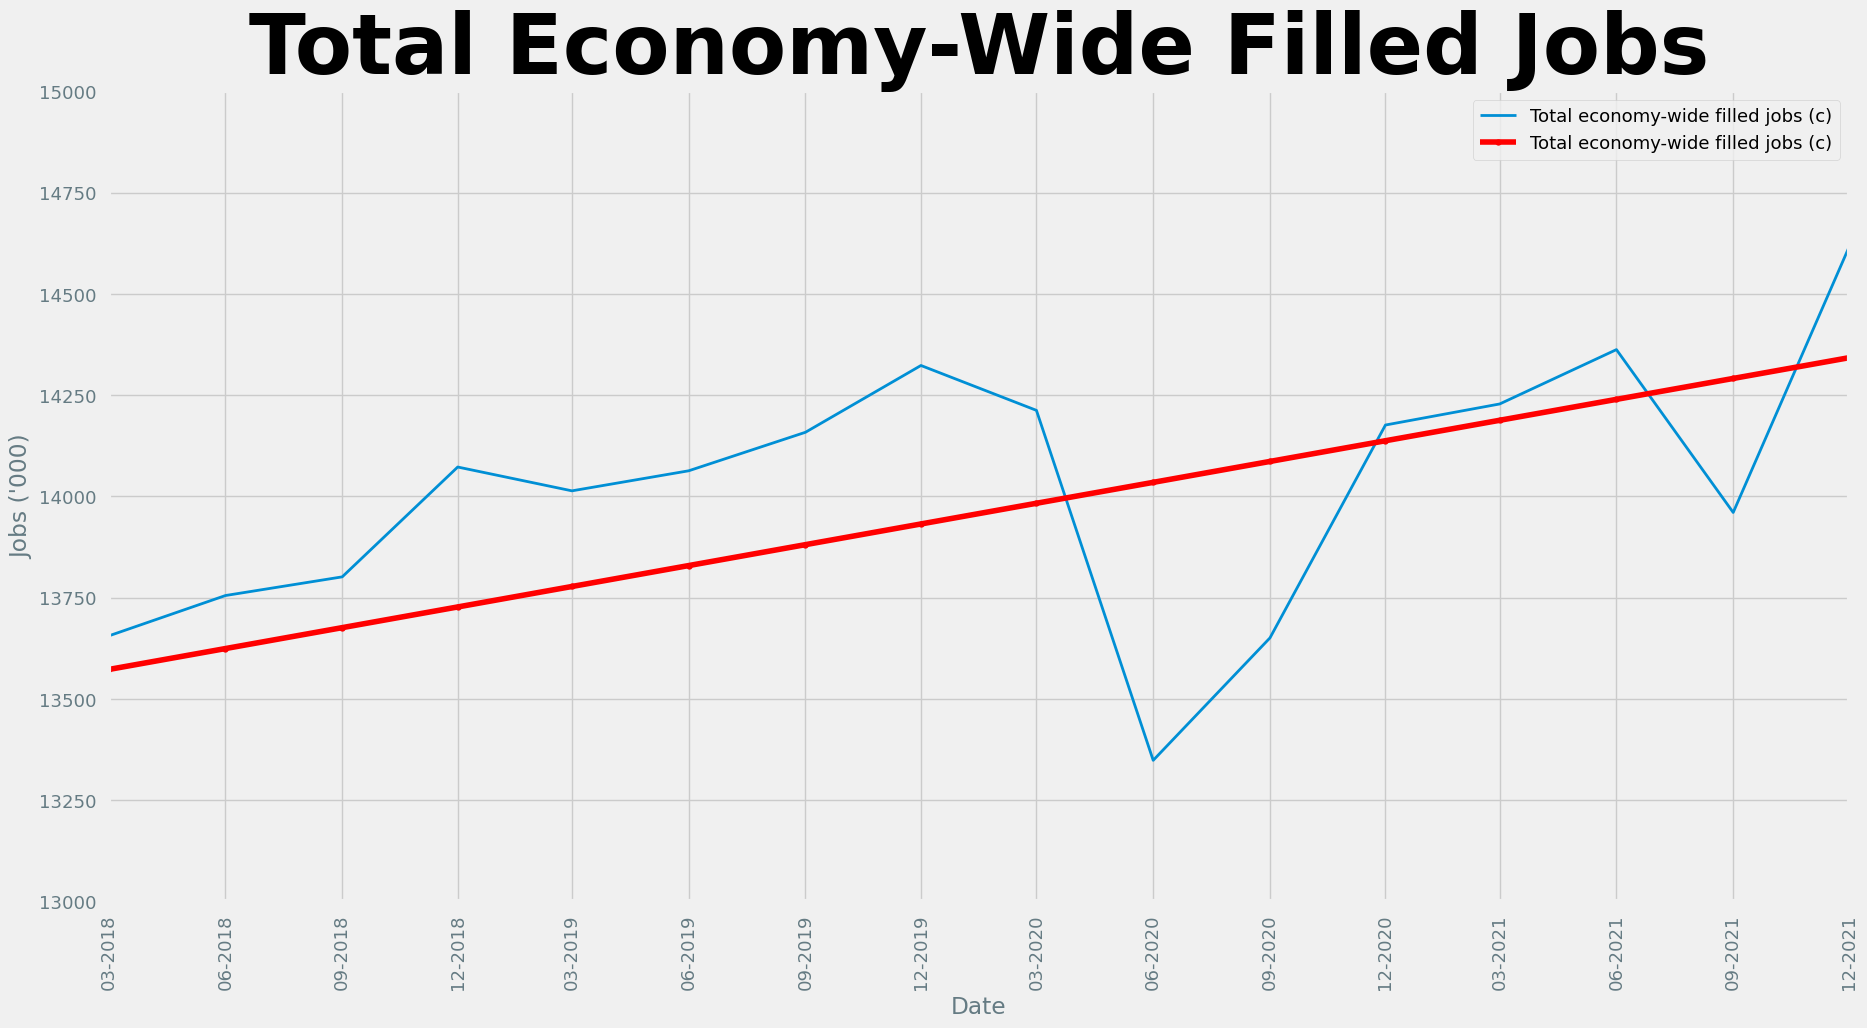

In [42]:
import datetime as dt
from datetime import datetime

plot_df_3 = pd.DataFrame(labour_df.loc[15])
plot_df_3
date_list = pd.DataFrame(plot_df_3.index)
date_list[0] = date_list[0].str.replace("Sep","09")
date_list[0] = date_list[0].str.replace("Dec","12")
date_list[0] = date_list[0].str.replace("Mar","03")
date_list[0] = date_list[0].str.replace("Jun","06")
date_list.drop(0,inplace=True)

date_list_2 = pd.DataFrame(columns=["Date","Timestamp"])
date_list = date_list[0].values.tolist()
date_list = pd.to_datetime(date_list)
date_list_2["Date"] = date_list
date_list_2["Timestamp"] = date_list_2["Date"]
for i in range(len(date_list_2)):
    date_list_2["Timestamp"][i] = date_list_2["Date"][i].toordinal()
date_list_2["Timestamp"] = date_list_2["Timestamp"].apply(pd.to_numeric)
date_list_2


plt.figure(figsize=(20,10))
labels=[plot_df_3.iloc[0,0]]
x_axis = plot_df_3.index.tolist()
x_axis.pop(0)

y_axis = plot_df_3.iloc[:,0].values.tolist()
y_axis.pop(0)
y_axis

xlabels = plot_df_2.columns.tolist()
xlabels.pop(0)
labels.append(plot_df_3.iloc[0,0])
datelist = plot_df_3.index.to_list()

date_list_2["Date"] = date_list_2["Date"].replace("00:00:00","")
plt.plot(date_list_2["Timestamp"],y_axis, linewidth=2, markersize=2)
plt.xticks(ticks=date_list_2["Timestamp"].tolist(),rotation=90, labels=xlabels)

slope, intercept, r_value, p_value, std_err  = st.linregress(date_list_2["Timestamp"], y_axis)
# print(slope, intercept, r_value, p_value, std_err)
plt.plot(date_list_2["Timestamp"],(slope*date_list_2["Timestamp"])+intercept,".-r")

plt.style.use('fivethirtyeight')
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 60}
plt.title("Total Economy-Wide Filled Jobs",fontdict=font)
plt.xlabel("Date")
plt.ylabel("Jobs ('000)")
plt.legend(labels)
plt.show 
print(f"The r value = {round(r_value,2)}")
plt.xlim(736754,738125)
plt.ylim(13000,15000)


In [14]:
file_path = "../project-1-group-10/Data/Labour data 2.csv"
gdp_df = pd.read_csv(file_path)
gdp_df.set_index("Unnamed: 0", inplace=True)


for i in gdp_df.columns:
    try:
        gdp_df[i] = gdp_df[i].str.replace(",","")
        gdp_df[i] = gdp_df[i].astype(int)
    except:
        pass

gdp_df

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
Unnamed: 0,,,,,,,,,,,,,,,,,
Accommodation,8582,9309,10253,11208,10665,10432,10800,11235,11693,11640,11807,12261,12306,13013,13471,11126,8152
Ownership of dwellings,2265,2447,2653,2894,3190,3350,3645,3896,4123,4299,4483,4639,4813,5004,5193,5187,5163
"Cafes, restaurants and takeaway food services",7223,7515,8000,8364,8292,8226,8463,9087,9792,10500,11289,12163,12782,13513,14385,11073,9631
"Clubs, pubs, taverns and bars",3017,3164,3375,3589,3615,3624,3693,3863,4077,4429,4857,5336,5683,6015,6363,4955,4102
Rail transport,632,647,677,694,711,752,750,775,809,827,864,919,941,1030,1113,852,396
Taxi transport,510,569,622,681,733,788,810,907,931,991,1025,1071,1130,1196,1266,909,367
Other road transport,1024,1057,1115,1148,1184,1241,1248,1306,1376,1411,1470,1562,1600,1704,1787,1402,752
"Air, water and other transport",12009,13095,14117,14287,14614,14468,15334,15720,15889,16697,17661,18350,19559,21430,23608,17471,6160
Transport equipment rental,1096,1174,1284,1299,1308,1287,1349,1378,1543,1586,1632,1708,1749,1810,1847,1569,1062


<function matplotlib.pyplot.show(close=None, block=None)>

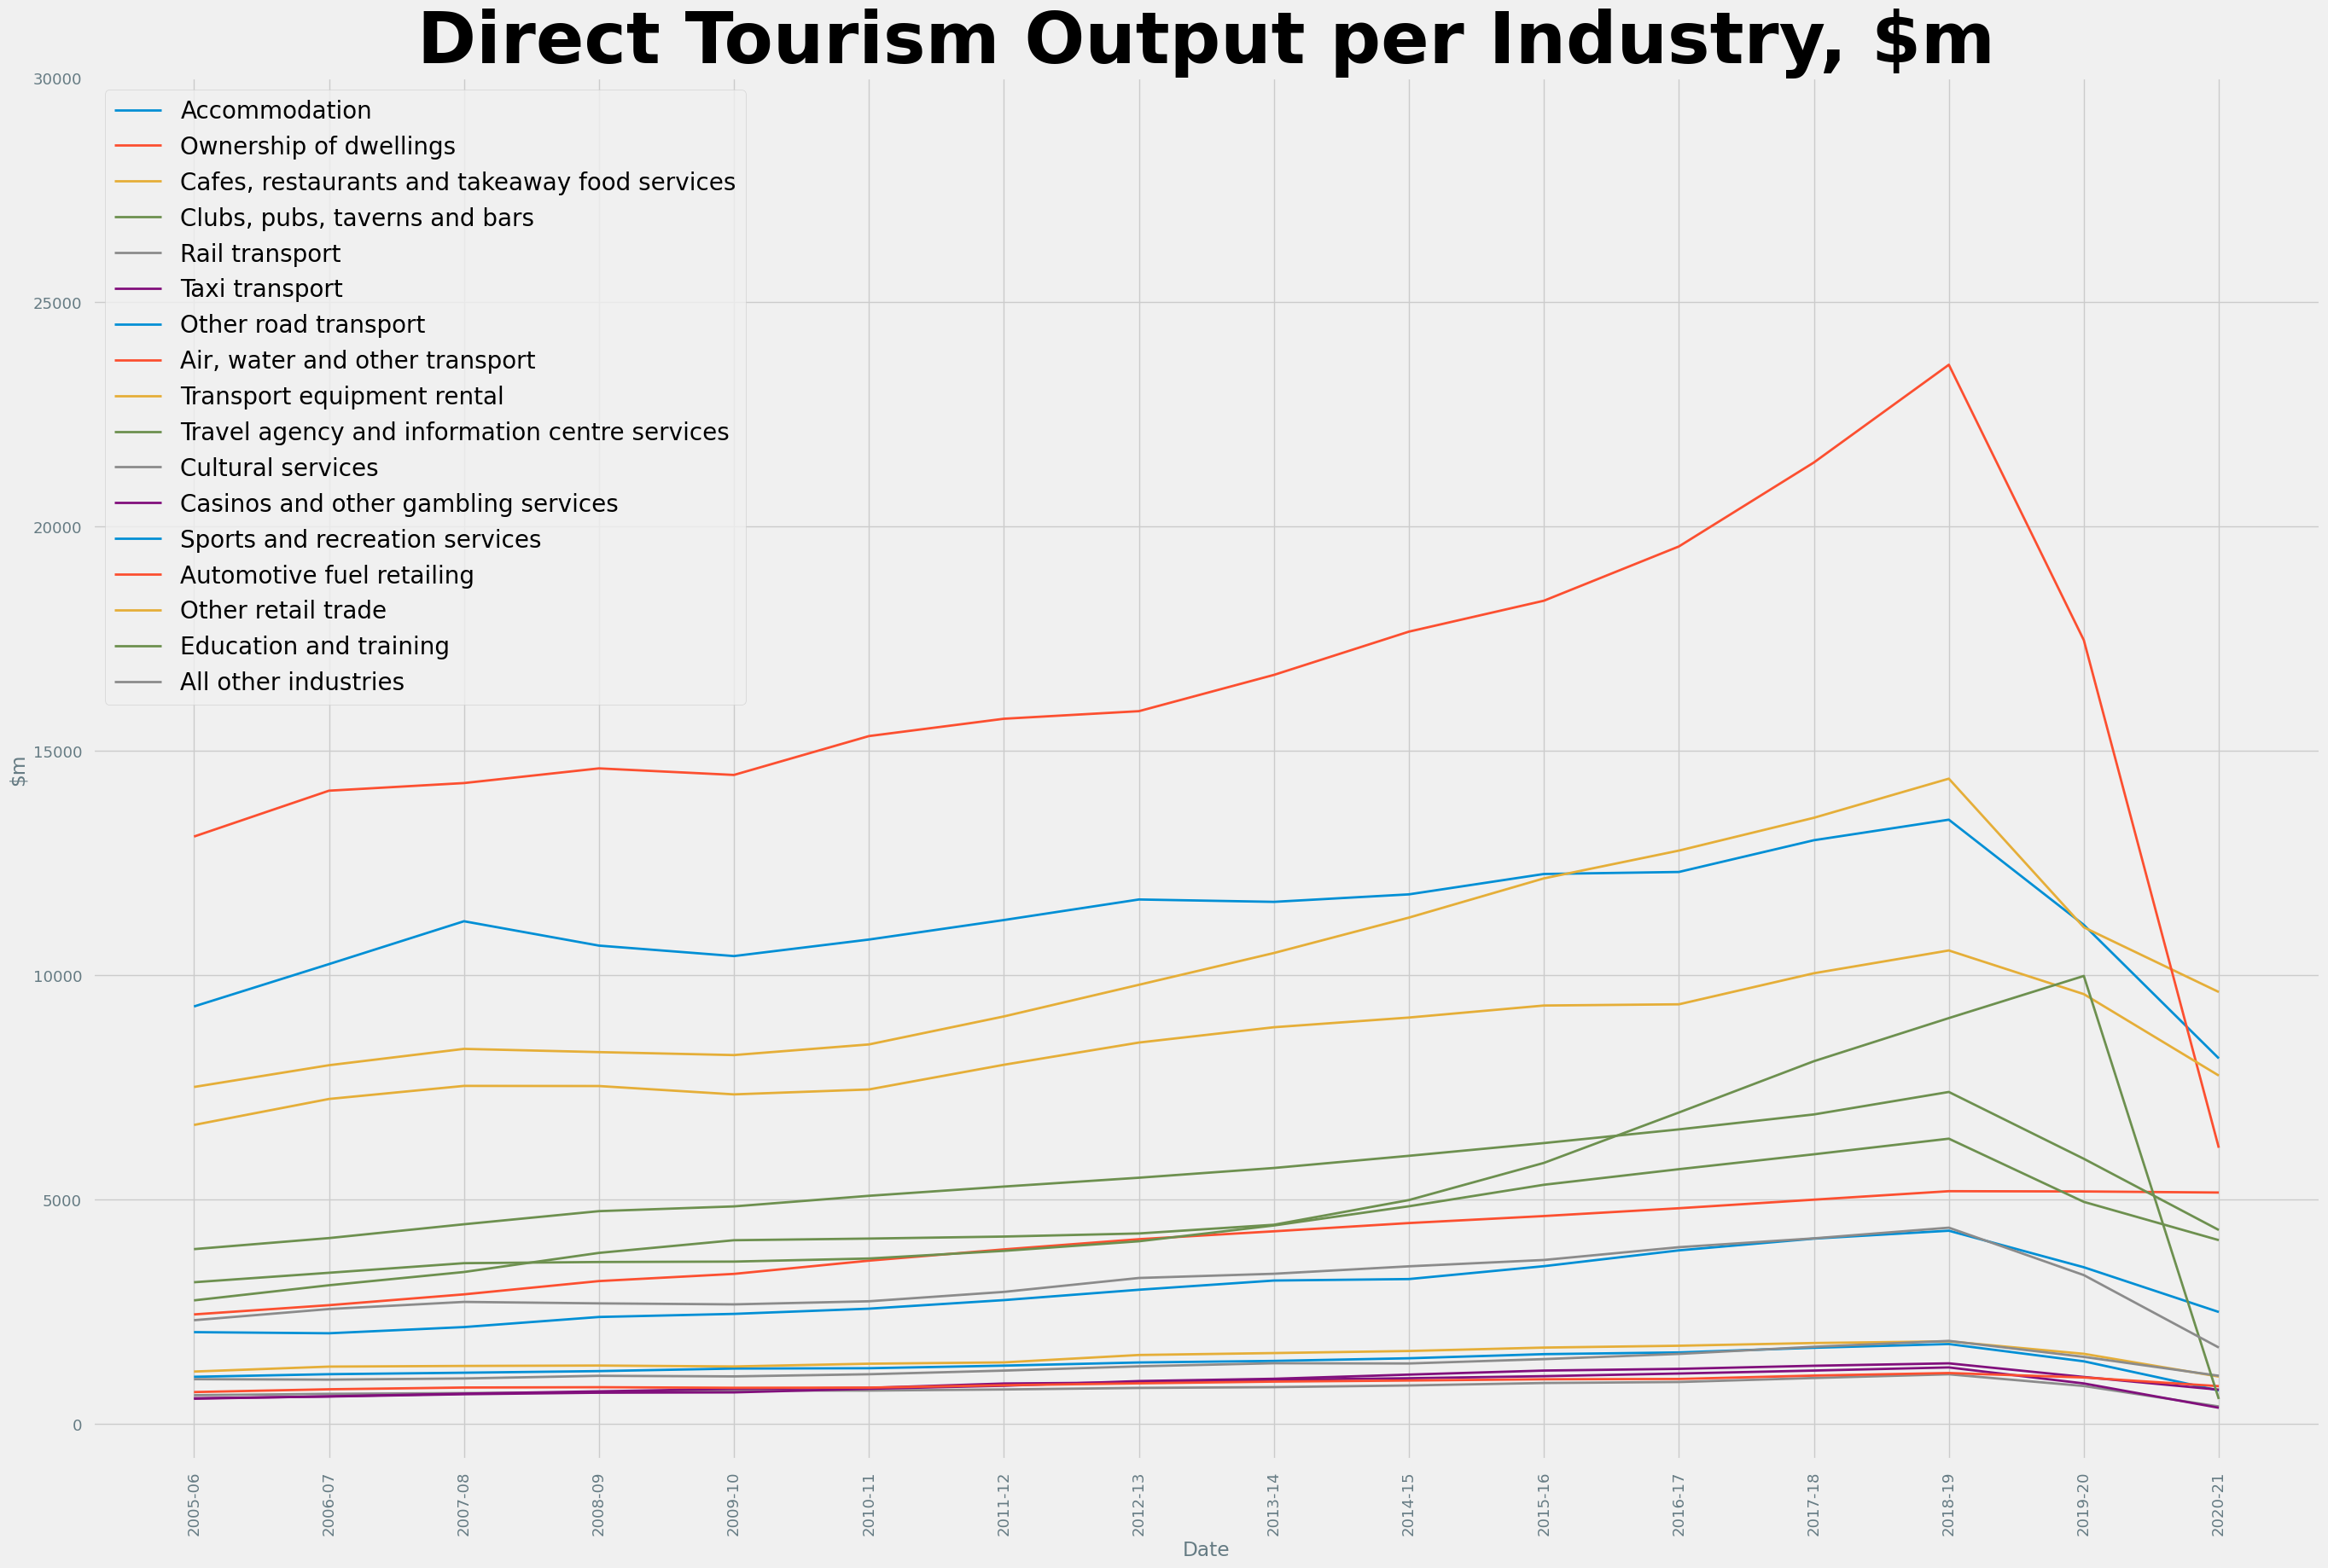

In [41]:
plt.figure(figsize=(30,20))
plot_df_4 = gdp_df.drop(labels=["Total tourism characteristic industries","Total tourism connected industries","Total direct tourism output, at basic prices"])
plot_df_4.reset_index(drop=True,inplace=True)
plot_df_4

labels= gdp_df.index
plt.style.use('fivethirtyeight')
for index,row in plot_df_4.iterrows():
    x_axis = plot_df_4.columns.values.tolist()
    x_axis.pop(0)
    y_axis = plot_df_4.loc[index,:].values.tolist()
    y_axis.pop(0)
    plt.plot(x_axis,y_axis, linewidth=2, markersize=2)




font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 60}
y_ticks = [0,5000,10000,15000,20000,25000,30000]
plt.xticks(ticks=x_axis,rotation=90)
plt.yticks(ticks=y_ticks)
plt.title("Direct Tourism Output per Industry, $m",fontdict=font)
plt.xlabel("Date")
plt.ylabel("$m")
plt.legend(labels,fontsize=20)
plt.show 



In [16]:
# To do: Total Tourism output
# Subplot with total tourism jobs (mean of each year)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 3000x2000 with 0 Axes>

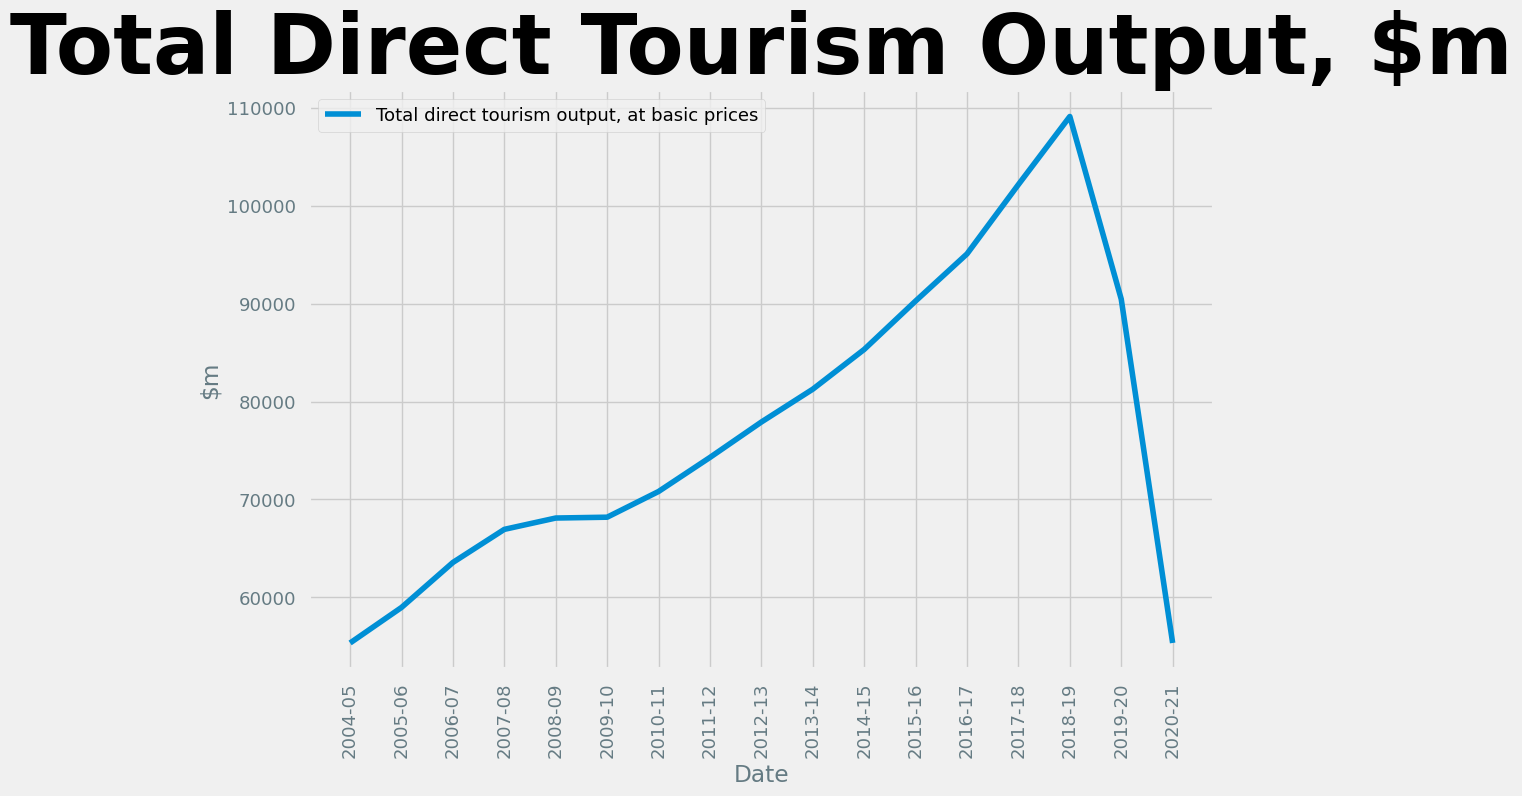

In [38]:
plt.figure(figsize=(30,20))
plot_df_5 = pd.DataFrame(gdp_df.iloc[19,:])

plot_df_5.plot(kind="line")

plt.style.use('fivethirtyeight')
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 60}
y_ticks = [0,5000,10000,15000,20000,25000,30000]
plt.xticks(range(0,len(plot_df_5.index)),plot_df_5.index, rotation=90)
plt.title("Total Direct Tourism Output, $m",fontdict=font)
plt.xlabel("Date")
plt.ylabel("$m")
plt.show 


<Figure size 3000x2000 with 0 Axes>

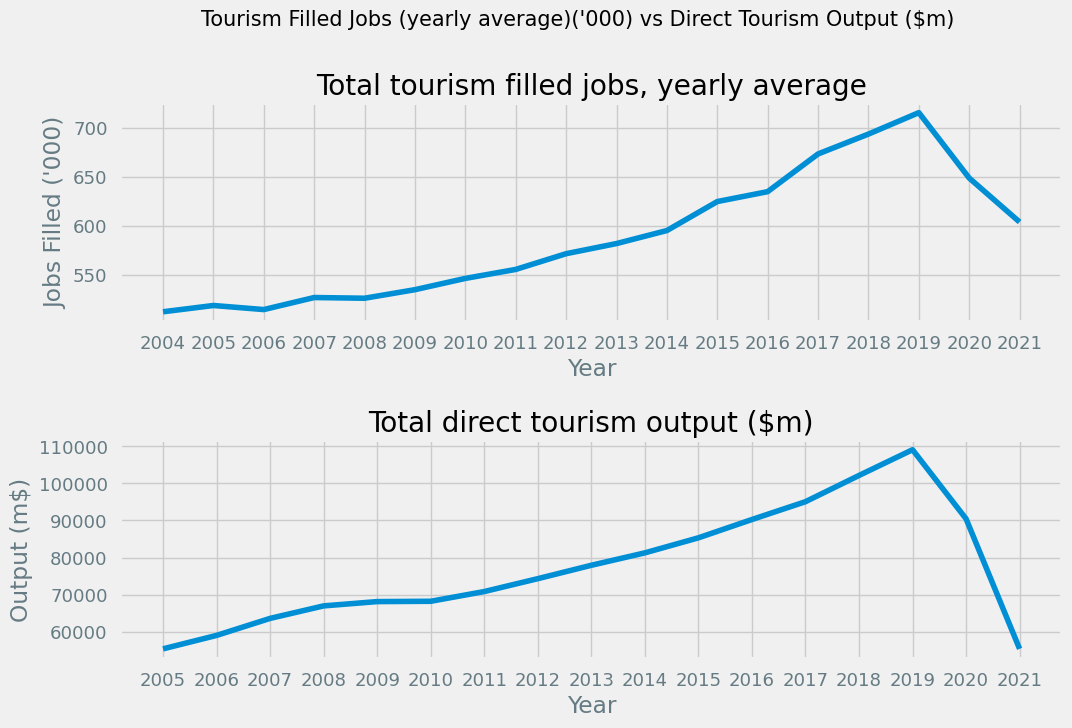

In [37]:
plt.style.use('fivethirtyeight')
df1 = pd.DataFrame(labour_df.loc[14])
df1.reset_index(inplace=True)
df1 = df1.drop(0,axis=0)
df1["index"] = pd.to_datetime(df1["index"])
df1 = pd.DataFrame(df1.groupby(df1['index'].map(lambda x: x.year)).mean())
df1 = df1.drop("index",axis=1)


plot_df_5["Years"] = ["2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
plot_df_5 = plot_df_5.set_index(plot_df_5["Years"])
plot_df_5

plt.figure(figsize=(30,20))
fig,(ax1,ax2) = plt.subplots(2)
fig.tight_layout(h_pad=5)



ax1.plot(df1.index,df1[14],label="Total tourism filled jobs, yearly average")
ax1.set_title("Total tourism filled jobs, yearly average")
ax1.set_xlabel("Year")
ax1.set_ylabel("Jobs Filled ('000)")
ax1.set_xticks(df1.index)

ax2.plot(plot_df_5.index,plot_df_5["Total direct tourism output, at basic prices"], label="Total direct tourism output, at basic prices")
ax2.set_title("Total direct tourism output ($m)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Output (m$)")
ax2.set_xticks(plot_df_5.index)


fig.suptitle("Tourism Filled Jobs (yearly average)('000) vs Direct Tourism Output ($m)", fontsize=15)
plt.subplots_adjust(top=0.85)


In [25]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
